In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('C:/Users/AJ/Documents/Workspace/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# checking for missing data
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data Treatment

In [6]:
# checking for duplicate data
dups = data.duplicated()

# report if there are any duplicates
print('Any duplicate data?')
print(dups.any())
print()
print(data[dups])

# droping duplicate data
data.drop_duplicates(inplace=True)

Any duplicate data?
True

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [7]:
# Identifying and removing outliers

outliers = data.values
x = outliers[:, :-1] 
y = outliers[:, -1]
print(x.shape, y.shape)

lof = LocalOutlierFactor()
yhat = lof.fit_predict(x)

# select all rows that are not outliers
outliers = [x for x in yhat if x != 1]
print('outliers: ', len(outliers))

# assinging the dataset that are not outliers
mask = yhat != -1 
inputX = x[mask, :]
outputY = y[mask]

# summarize the shape of the updated dataset
print(inputX.shape, outputY.shape)

# fit the model
model = LogisticRegression()
model.fit(inputX, outputY)
print()

# evaluate predictions
mae = mean_absolute_error(y, yhat)
print('The mean absolute error (MAE) is: %.3f' % mae)

(302, 13) (302,)
outliers:  10
(292, 13) (292,)

The mean absolute error (MAE) is: 0.490


In [8]:
# collecting the data without outlier

xDf = pd.DataFrame(inputX)
yDf = pd.DataFrame(outputY)

heart = pd.concat([xDf, yDf], axis= 1)
heart.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
288,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
289,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
290,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


# Feature Selection

In [9]:
# Tuning for the best possible number of features to select

sHeart = heart.values
c = sHeart[:, :-1]
d = sHeart[:, -1]

# get a list of models to evaluate
def getModels():
    models = dict()
    for i in range(2, 14):
        model = LogisticRegression()
        rfe = RFE(model, n_features_to_select=i)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluateModel(model, c, d):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, c, d, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = getModels()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluateModel(model, c, d)
    results.append(scores)
    names.append(name)
    print('for %s features, Mean Absolute Error is: %.1f, Std is: %.3f' % (name, mean(scores) * 100, std(scores)))

for 2 features, Mean Absolute Error is: -29.6, Std is: 0.062
for 3 features, Mean Absolute Error is: -29.3, Std is: 0.057
for 4 features, Mean Absolute Error is: -24.6, Std is: 0.070
for 5 features, Mean Absolute Error is: -23.3, Std is: 0.066
for 6 features, Mean Absolute Error is: -19.5, Std is: 0.058
for 7 features, Mean Absolute Error is: -16.3, Std is: 0.057
for 8 features, Mean Absolute Error is: -16.7, Std is: 0.059
for 9 features, Mean Absolute Error is: -17.0, Std is: 0.061
for 10 features, Mean Absolute Error is: -16.8, Std is: 0.062
for 11 features, Mean Absolute Error is: -17.4, Std is: 0.073
for 12 features, Mean Absolute Error is: -17.4, Std is: 0.074
for 13 features, Mean Absolute Error is: -16.9, Std is: 0.066


A selection of 7 features gives the best near to zero mean absolute error

In [111]:
# Identfying the algorithm that would select feature better

fHeart = heart.values
a = fHeart[:, :-1]
b = fHeart[:, -1]

# get a list of models to evaluate
def getModels():
    models = dict()
    
    # linear regression
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=7) # for regression model use LinearRegression
    models['Logistic regression'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # perceptron
    model = Perceptron()
    rfe = RFE(model, n_features_to_select=7)
    models['Perceptron'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # decision tree
    model = DecisionTreeClassifier()
    rfe = RFE(model, n_features_to_select=7) # for regression model use DecisionTreeRegressor
    models['Decision tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # random forest
    model = RandomForestClassifier()
    rfe = RFE(model, n_features_to_select=7) # for regression model use RandomForestRegressor
    models['Random forest'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # gradient boosting 
    model = GradientBoostingClassifier()
    rfe = RFE(model, n_features_to_select=7) # for regression model use GradientBoostingRegressor
    models['Gradient boosting'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluateModel(model, a, b):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, a, b, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = getModels()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluateModel(model, a, b)
    results.append(scores)
    names.append(name)
    print('%s algorithm has %.3f Mean and a Std of %.3f' % (name, mean(scores)*100, std(scores)))


Logistic regression algorithm has -16.337 Mean and a Std of 0.057
Perceptron algorithm has -39.441 Mean and a Std of 0.105
Decision tree algorithm has -24.751 Mean and a Std of 0.070
Random forest algorithm has -20.188 Mean and a Std of 0.058
Gradient boosting algorithm has -22.471 Mean and a Std of 0.077


Although Logistic Regression Algorithm has the closest value to zero,  would be using the Random forest algorithm as this selects features shown in my exploratory analysis

In [10]:
# evealuting the result for selecting 7 features

sHeart7= heart.values
e = sHeart7[:, 0:-1]
f = sHeart7[:, -1]

# feature extraction
model = RandomForestClassifier()

rfe = RFE(model, n_features_to_select=7)
pipeline = Pipeline(steps=[('s',rfe), ('m',model)])
fit = rfe.fit(e, f)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
nScores = cross_val_score(pipeline, e, f, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('Mean Absolute Error: %.3f '  %  (mean(nScores)))
print()
print('Standard Deviation Accuracy: %.3f' % std(nScores))
print()
print('Selected Features: {}'.format(fit.n_features_))

Mean Absolute Error: -0.191 

Standard Deviation Accuracy: 0.058

Selected Features: 7


In [11]:
# identifying the features that were selected

features = rfe.transform(e)

iHeart = pd.DataFrame(features)
iHeart.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

# to make it look organised when returning 
heartCol = dict()
cols = list(heart.columns)[0:-1] # the list of columns in your data
for col in cols:
    heartCol[col]= heart[col].values.tolist()
    
collen = len(iHeart.columns.tolist())
counter = 0
while counter < collen:
    colLabel = ''
    if counter == 0:
        colLabel = 'a'
    elif counter == 1:
        colLabel = 'b'
    elif counter == 2:
        colLabel = 'c'
    elif counter == 3:
        colLabel = 'd'  
    elif counter == 4:
        colLabel = 'e'
    elif counter == 5:
        colLabel = 'f'
    elif counter == 6:
        colLabel = 'g'
    else:
        pass
    colData = iHeart.loc[:,colLabel]
    colDataVals = list(colData.values)
    for item in heartCol.items():
        if colDataVals == item[1]:
            print('Label is: ', item[0])
    counter+=1
print()
# end of organisation

print('The selected features are: ')
iHeart.head(10)

Label is:  age
Label is:  cp
Label is:  chol
Label is:  thalach
Label is:  oldpeak
Label is:  ca
Label is:  thal

The selected features are: 


,a,b,c,d,e,f,g
0,63.0,3.0,233.0,150.0,2.3,0.0,1.0
1,37.0,2.0,250.0,187.0,3.5,0.0,2.0
2,41.0,1.0,204.0,172.0,1.4,0.0,2.0
3,56.0,1.0,236.0,178.0,0.8,0.0,2.0
4,57.0,0.0,354.0,163.0,0.6,0.0,2.0
5,57.0,0.0,192.0,148.0,0.4,0.0,1.0
6,56.0,1.0,294.0,153.0,1.3,0.0,2.0
7,44.0,1.0,263.0,173.0,0.0,0.0,3.0
8,52.0,2.0,199.0,162.0,0.5,0.0,3.0
9,57.0,2.0,168.0,174.0,1.6,0.0,2.0


Crosscheck this slection with the exploratory analysis and charts

In [12]:
# collecting the selected feature
iHeart.columns = ['age', 'cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']
iHeart['target'] = heart['target']
iHeart.head()

,age,cp,chol,thalach,oldpeak,ca,thal,target
0,63.0,3.0,233.0,150.0,2.3,0.0,1.0,1.0
1,37.0,2.0,250.0,187.0,3.5,0.0,2.0,1.0
2,41.0,1.0,204.0,172.0,1.4,0.0,2.0,1.0
3,56.0,1.0,236.0,178.0,0.8,0.0,2.0,1.0
4,57.0,0.0,354.0,163.0,0.6,0.0,2.0,1.0


In [13]:
iHeart.describe()

,age,cp,chol,thalach,oldpeak,ca,thal,target
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,54.250000,0.965753,244.140411,149.616438,1.036644,0.708904,2.311644,0.544521
std,9.069179,1.034886,44.208862,22.297199,1.163828,1.005580,0.611011,0.498869
min,29.000000,0.000000,131.000000,88.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,211.000000,133.000000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,240.000000,152.000000,0.750000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,273.250000,166.000000,1.600000,1.000000,3.000000,1.000000
max,77.000000,3.000000,360.000000,202.000000,6.200000,4.000000,3.000000,1.000000


# Data Transformation 

In [14]:
# rescaling the data
rescale = iHeart.values
g= rescale[:, 0:-1]
h= rescale[:, -1]

scaler = MinMaxScaler()
rh = scaler.fit_transform(g)
set_printoptions(precision=3)

# put transorm data into dataframe and display
rHeart = pd.DataFrame(rh)
rHeart.columns = ['age', 'cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']

# adding back the 'target' output feature
rHeart['target'] = iHeart['target']
rHeart.describe()


,age,cp,chol,thalach,oldpeak,ca,thal,target
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.526042,0.321918,0.494063,0.540495,0.167201,0.177226,0.770548,0.544521
std,0.188941,0.344962,0.193052,0.195589,0.187714,0.251395,0.203670,0.498869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,0.349345,0.394737,0.000000,0.000000,0.666667,0.000000
50%,0.541667,0.333333,0.475983,0.561404,0.120968,0.000000,0.666667,1.000000
75%,0.666667,0.666667,0.621179,0.684211,0.258065,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


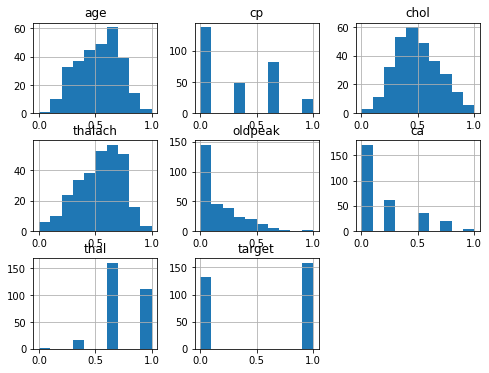

In [15]:
rHeart.hist()
plt.gcf().set_size_inches(8,6)

In [16]:
# Normalizing the data

norm = rHeart.values
i = norm[:, 0:-1]
j = norm[:, -1]

nScaler = Normalizer()
nh = nScaler.fit_transform(i)
set_printoptions(precision=3)

# put transorm data into dataframe and display
nHeart = pd.DataFrame(nh)
nHeart.columns = ['age', 'cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']

# adding back the 'target' output feature
nHeart['target'] = rHeart['target']
nHeart.describe()

,age,cp,chol,thalach,oldpeak,ca,thal,target
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.187960,0.003341,0.827948,0.516388,0.003656,0.002445,0.008015,0.544521
std,0.039682,0.003640,0.055878,0.087848,0.004250,0.003527,0.002433,0.498869
min,0.100500,0.000000,0.643859,0.299937,0.000000,0.000000,0.000000,0.000000
25%,0.156380,0.000000,0.789714,0.458818,0.000000,0.000000,0.006418,0.000000
50%,0.186506,0.002962,0.830460,0.521622,0.002453,0.000000,0.007468,1.000000
75%,0.211409,0.006655,0.868742,0.581817,0.005900,0.003788,0.009969,1.000000
max,0.342897,0.011895,0.933896,0.746384,0.027236,0.016062,0.016355,1.000000


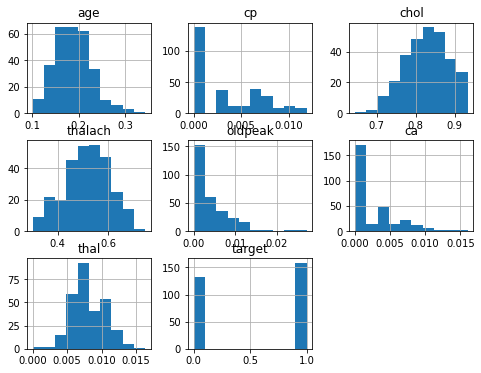

In [79]:
nHeart.hist()
plt.gcf().set_size_inches(8,6)

In [29]:
# Testing out the accuracy of the transformed data

tHeart = nHeart.values
x = tHeart[:, 0:-1]
y = tHeart[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

model = RandomForestClassifier()
model.fit(x_train, y_train) 

# evaluate the model
yhat = model.predict(x_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('The accuracy of the selected features for modeling is: %.2f' % (accuracy*100))

The accuracy of the selected features for modeling is: 79.38
